# Aula 21 – Agrupamentos

## 1. Introdução

Os métodos de classificação estudados nas últimas duas aulas dependem de um conjunto de imagens pré-classificadas para treino. Ou seja, precisamos dizer explicitamente para o algoritmo quais tipos de coisas queremos identificar e dar exemplos. Entretanto, pode ser interessante obter classificações sem que nós mesmos percebamos a existência de determinadas classes, ou seja, o algoritmo, além de identificar uma classe para uma imagem, ainda tem que ele mesmo dizer as classes existentes. Para realizar essa tarefa, temos os métodos de agrupamento, que fazem a divisão das imagens dadas em diferentes grupos de acordo com suas semelhanças. Esses algoritmos, portanto, se utilizam de formas de calcular semelhanças entre dados (por exemplo, cálculo da distância).

Um algoritmo clássico para agrupamento é o k-médias (k-means). Ele recebe os dados não classificados de treino e o número K de classes nas quais você pretende agrupar aqueles dados. Iterativamente ele faz a divisão e, quando entrado um novo dado, ele insere (classifica) em uma das K classes treinadas. O processo de treinamento ocorre da seguinte forma:

    1. Defina K pontos aleatórios (cada um no formato do dado a ser classificado). Esses serão as “centroides” das K classes;
    2. Pegue um dado de treino e calcule a distância euclidiana a cada um dos K centroides. Atribua à classe de centroide mais próxima;
    3. Ajuste a centroide da classe calculando a média das posições de todos os dados da classe (como é iterativo, apenas pegue a centroide atual e calcule a média com o novo dado inserido)
    4. Volte para 2 enquanto tiver dado de treino.

Após treinado, quando entrado um novo dado, ele será classificado como pertencente à classe de centroide mais próxima (perceba que o treino pode inclusive continuar).

Existem também os métodos de agrupamento hierárquico. Nesses algoritmos, você inicia com uma só classe e essa vai sendo dividida iterativamente. O agrupamento hierárquico é representado graficamente por um dendrograma.

Note que os métodos de agrupamento encontram as classes mas, obviamente, não dão nomes às classes. Seu uso é em casos nos quais você não sabe o que quer identificar na imagem e diz apenas quantas coisas diferentes gostaria de ver.

## 2. Leitura Complementar

Livro E – Seção 11.7

Livro 1 – Seção 9.3

## 3. Exercícios

1. Realize o tutorial de k-médias da OpenCV
( https://docs.opencv.org/master/d1/d5c/tutorial_py_kmeans_opencv.html ). 

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

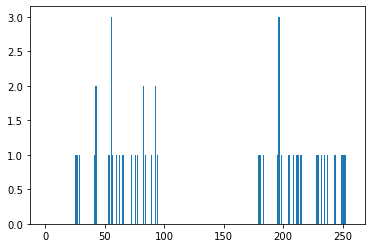

((array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 1., 2., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 1., 0., 3., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0.,
         0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 2., 0., 1.,
         0., 0., 0., 0., 1., 0., 0., 2., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 1., 3., 0., 1., 0., 0., 0., 0., 0.,
         1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0.,

In [2]:
x = np.random.randint(25,100,25)
y = np.random.randint(175,255,25)
z = np.hstack((x,y))
z = z.reshape((50,1))
z = np.float32(z)
plt.hist(z,256,[0,256]),plt.show()

In [3]:
# Define criteria = ( type, max_iter = 10 , epsilon = 1.0 )
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
# Set flags (Just to avoid line break in the code)
flags = cv.KMEANS_RANDOM_CENTERS
# Apply KMeans
compactness,labels,centers = cv.kmeans(z,2,None,criteria,10,flags)

In [4]:
A = z[labels==0]
B = z[labels==1]

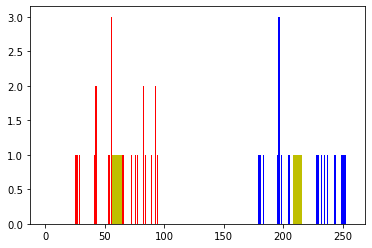

In [5]:
# Now plot 'A' in red, 'B' in blue, 'centers' in yellow
plt.hist(A,256,[0,256],color = 'r')
plt.hist(B,256,[0,256],color = 'b')
plt.hist(centers,32,[0,256],color = 'y')
plt.show()

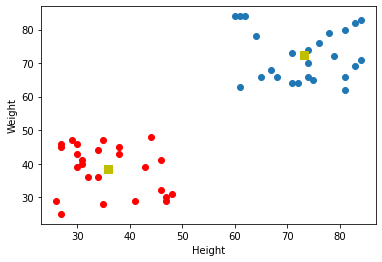

In [6]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
X = np.random.randint(25,50,(25,2))
Y = np.random.randint(60,85,(25,2))
Z = np.vstack((X,Y))
# convert to np.float32
Z = np.float32(Z)
# define criteria and apply kmeans()
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
ret,label,center=cv.kmeans(Z,2,None,criteria,10,cv.KMEANS_RANDOM_CENTERS)
# Now separate the data, Note the flatten()
A = Z[label.ravel()==0]
B = Z[label.ravel()==1]
# Plot the data
plt.scatter(A[:,0],A[:,1])
plt.scatter(B[:,0],B[:,1],c = 'r')
plt.scatter(center[:,0],center[:,1],s = 80,c = 'y', marker = 's')
plt.xlabel('Height'),plt.ylabel('Weight')
plt.show()

In [8]:
import numpy as np
import cv2 as cv
img = cv.imread('moedasw.jpg')
Z = img.reshape((-1,3))
# convert to np.float32
Z = np.float32(Z)
# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 8
ret,label,center=cv.kmeans(Z,K,None,criteria,10,cv.KMEANS_RANDOM_CENTERS)
# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))
cv.imshow('res2',res2)
cv.waitKey(0)
cv.destroyAllWindows()